In [135]:
%reload_ext autoreload
%autoreload 2

import config
import my_plotting as mp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
file_path = pd.read_csv('tbsh_gyeonggi_day_202507_이천시.csv')
df = file_path
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536716 entries, 0 to 536715
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ta_ymd           536716 non-null  int64 
 1   cty_rgn_no       536716 non-null  int64 
 2   admi_cty_no      536716 non-null  int64 
 3   card_tpbuz_cd    536716 non-null  object
 4   card_tpbuz_nm_1  536716 non-null  object
 5   card_tpbuz_nm_2  536716 non-null  object
 6   hour             536716 non-null  int64 
 7   sex              536716 non-null  object
 8   age              536716 non-null  int64 
 9   day              536716 non-null  int64 
 10  amt              536716 non-null  int64 
 11  cnt              536716 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 49.1+ MB


In [137]:
# 한글폰트 설치
config.set_korean_font()

# amt, cnt 제외 카테고리화
df['day'] = df['day'].map(config.DAY_MAP)
df['hour'] = df['hour'].map(config.TIME_SHORT_MAP)
df['age'] = df['age'].map(config.AGE_MAP)

df['cty_rgn_no'] = df['cty_rgn_no'].astype('category')
df['admi_cty_no'] = df['admi_cty_no'].astype('category')
df['card_tpbuz_cd'] = df['card_tpbuz_cd'].astype('category')
df['card_tpbuz_nm_1'] = df['card_tpbuz_nm_1'].astype('category')
df['card_tpbuz_nm_2'] = df['card_tpbuz_nm_2'].astype('category')
df['hour'] = df['hour'].astype('category')
df['sex'] = df['sex'].astype('category')
df['age'] = df['age'].astype('category')
df['day'] = df['day'].astype('category')

#날짜
df['ta_ymd'] = pd.to_datetime(df['ta_ymd'], format="%Y%m%d")

df.info()

한글 폰트 설정이 완료되었습니다.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536716 entries, 0 to 536715
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ta_ymd           536716 non-null  datetime64[ns]
 1   cty_rgn_no       536716 non-null  category      
 2   admi_cty_no      536716 non-null  category      
 3   card_tpbuz_cd    536716 non-null  category      
 4   card_tpbuz_nm_1  536716 non-null  category      
 5   card_tpbuz_nm_2  536716 non-null  category      
 6   hour             536716 non-null  category      
 7   sex              536716 non-null  category      
 8   age              536716 non-null  category      
 9   day              536716 non-null  category      
 10  amt              536716 non-null  int64         
 11  cnt              536716 non-null  int64         
dtypes: category(9), datetime64[ns](1), int64(2)
memory usage: 16.9 MB


C:\Users\owner\AppData\Local\Temp\ipykernel_9544\3146548222.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ymd_amount.index, y=ymd_amount.values, ax=ax1, alpha=0.7, palette=bar_color)
C:\Users\owner\AppData\Local\Temp\ipykernel_9544\3146548222.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(range(1,32))


Text(0.5, 0, '')

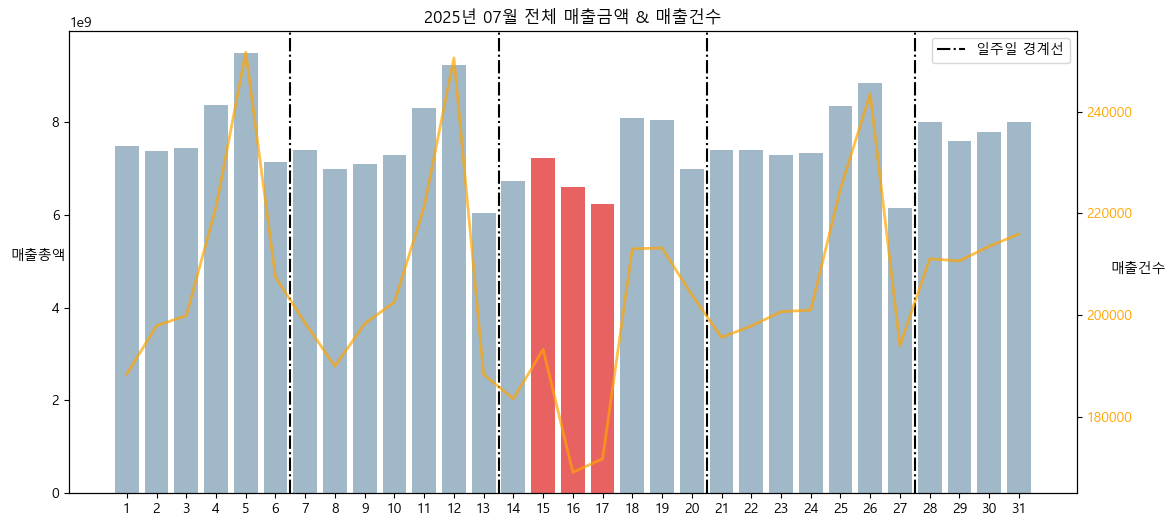

In [138]:
# 월 단위 분석:
## 이중 축 그래프 생성하기(7월 한달동안 전체 매출총액과 건수 확인)

#일 컬럼 생성
df['July_day'] = df['ta_ymd'].dt.day-1

## 매출금액 + 기준년월일 / 매출건수 + 기준년월일
ymd_amount = df.groupby('July_day')['amt'].sum()
ymd_count = df.groupby('July_day')['cnt'].sum()

#그림판(도화지) 제공
fig, ax1 = plt.subplots(figsize=(13,6))

## bar_color
for i in range(5,32,7):
  if i == 5:
     plt.axvline(x=i+0.5, color='black', linestyle='-.',label="일주일 경계선")
  else:
     plt.axvline(x=i+0.5, color='black', linestyle='-.')

plt.legend()
bar_color = ['#6f9dbd'] * len(ymd_amount.index)

bar_color[14] = 'red'
bar_color[15] = 'red'
bar_color[16] = 'red'
## bar
sns.barplot(x=ymd_amount.index, y=ymd_amount.values, ax=ax1, alpha=0.7, palette=bar_color)
ax1.set_xticklabels(range(1,32))

# 이중 축 (매출건수)
ax2 = ax1.twinx()

ax2.tick_params(axis='y', labelcolor='orange')
sns.lineplot(data = ymd_count, linewidth = 2, linestyle='-', ax=ax2, alpha=0.7, color='orange')
plt.title("2025년 07월 전체 매출금액 & 매출건수")
ax1.set_ylabel("매출총액", rotation=0, labelpad=10)
ax2.set_ylabel("매출건수", rotation=0)

ax1.set_xlabel("")

In [ ]:
# 

C:\Users\owner\AppData\Local\Temp\ipykernel_9544\593979106.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  week_day = df.groupby('day')['amt'].sum()
C:\Users\owner\AppData\Local\Temp\ipykernel_9544\593979106.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=week_day.index,y=week_day.values/100000000, palette=bar_color, order=my_order, ax=ax)


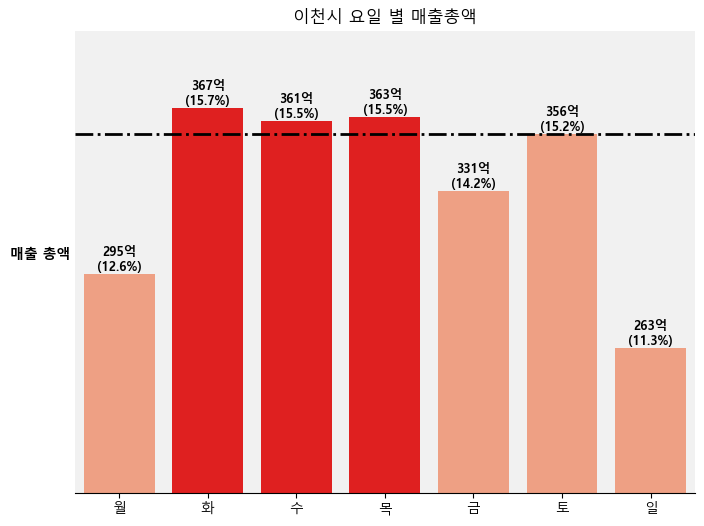

In [ ]:
# 주 단위 분석(월~일) / 월초 중반 월말 그룹 분포 / 현재 초복 있는 주가 적은건 더위때문인가 ? 월급날과 가깝기 때문인가 ?
# 일주일 요일별 
# 
week_day = df.groupby('day')['amt'].sum()

fig, ax = plt.subplots(figsize=(8,6))

my_order=['월','화','수','목','금','토','일']

bar_color = ['#ff9873'] * len(week_day.index)
bar_color[1] = 'red'
bar_color[2] = 'red'
bar_color[3] = 'red'
sns.barplot(x=week_day.index,y=week_day.values/100000000, palette=bar_color, order=my_order, ax=ax)

plt.title("이천시 요일 별 매출총액")
ax.set_ylabel("매출 총액", weight='bold', rotation=0, labelpad=25)
ax.set_xlabel("")
ax.set_ylim(200,400)
ax.set_yticks([])
ax.patch.set_facecolor("#f0f0f0ed")
ax.set_facecolor("#f0f0f0ed")

hline=week_day.loc['토']/100000000

plt.axhline(y=hline, linestyle="-.", linewidth=2, color='black')

for i, (index, value) in enumerate(week_day.reindex(my_order).items()):
    pct = (value/week_day.sum())*100
    text = f"{value/100000000:.0f}억\n({pct:.1f}%)"

    ax.text(x=i, y=value/100000000, s=text, ha='center', va='bottom', fontsize=9, weight='bold')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible('black') 
ax.spines['left'].set_visible(False)
